<a href="https://colab.research.google.com/github/ChengyuZhu/Python-Project-Network-Building/blob/master/Network_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Build network
import networkx as nx
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Read in a Linkedin textfile of adjacency matrix 
f = open('/content/drive/My Drive/C_Neighborhood_1.txt', 'r')
count=0
nodes = []
edges = []
for line in f:
  count+=1
  each = line.strip().split('\t')
  for i in range(1,len(each)):
    temptuple=(each[0],each[i])
    edges.append(temptuple)
  nodes.append(each[0])
  if count<10:
    print(each)
    print('This is nodes:')
    print(nodes)
    print('That is edges:')
    print(edges)
print('total number of rows %d' %(count))
f.close()

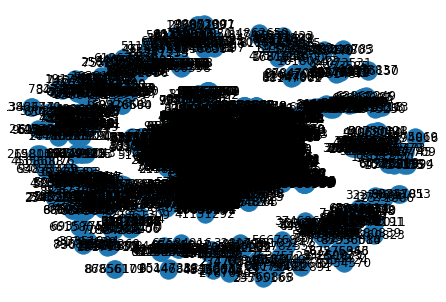

In [ ]:
#instantiate the graph
G=nx.Graph()
# Add nodes to the graph
G.add_nodes_from(nodes)
# Add edges to the graph
G.add_edges_from(edges)
# visualize
nx.draw(G, with_labels=True)

In [ ]:
#obtain elinks
elink = edges
#obtain plinks
plink = []
for i in range(len(G.nodes())):
  for j in range(i+1,len(G.nodes())):
    plink.append((list(G.nodes())[i], list(G.nodes())[j]))
#keep plinks, drop elinks in plinks
plink = list(set(plink).difference(set(elink)))

In [ ]:
#compute the adar‐adamic index
pred_adar_e = nx.adamic_adar_index(G,elink)
links_e = []
index_adar_e = []
for u,v,p in pred_adar_e:
  links_e.append((u,v))
  index_adar_e.append(p)

#compute the preferential attachment
pred_pref_e = nx.preferential_attachment(G,elink)
index_pref_e = []
for u,v,p in pred_pref_e:
  index_pref_e.append(p)

#compute the jaccard coefficient
pred_jac_e = nx.jaccard_coefficient(G,elink)
index_jac_e = []
for u,v,p in pred_jac_e:
  index_jac_e.append(p)

#compute the resource allocation index
pred_reso_e = nx.resource_allocation_index(G,elink)
index_reso_e = []
for u,v,p in pred_reso_e:
  index_reso_e.append(p)

In [ ]:
#build elink dataframe with 4 features
import pandas as pd

Elink_df = pd.DataFrame(columns=['links','adar','pref','jac','reso','type_e'])

Elink_df['links'] = links_e
Elink_df['adar'] = index_adar_e
Elink_df['pref'] = index_pref_e
Elink_df['jac'] = index_jac_e
Elink_df['reso'] = index_reso_e
Elink_df['type_e'] = 1

#count rows
print(Elink_df.shape[0])

9474


In [ ]:
#compute the adar‐adamic index
pred_adar_p = nx.adamic_adar_index(G,plink)
links_p = []
index_adar_p = []
for u,v,p in pred_adar_p:
  links_p.append((u,v))
  index_adar_p.append(p)

#compute the preferential attachment
pred_pref_p = nx.preferential_attachment(G,plink)
index_pref_p = []
for u,v,p in pred_pref_p:
  index_pref_p.append(p)

#compute the jaccard coefficient
pred_jac_p = nx.jaccard_coefficient(G,plink)
index_jac_p = []
for u,v,p in pred_jac_p:
  index_jac_p.append(p)

#compute the resource allocation index
pred_reso_p = nx.resource_allocation_index(G,plink)
index_reso_p = []
for u,v,p in pred_reso_p:
  index_reso_p.append(p)

In [ ]:
#build plink dataframe with 4 features
Plink_df = pd.DataFrame(columns=['links','adar','pref','jac','reso','type_e'])
Plink_df['links'] = links_p
Plink_df['adar'] = index_adar_p
Plink_df['pref'] = index_pref_p
Plink_df['jac'] = index_jac_p
Plink_df['reso'] = index_reso_p
Plink_df['type_e'] = 0

#count rows
print(Plink_df.shape[0])

7427703


In [ ]:
#join plink dataframe and elink dataframe
link_df = pd.concat([Elink_df, Plink_df])
print(link_df)

                        links      adar  pref       jac      reso  type_e
0         (6745388, 24988750)  0.000000     3  0.000000  0.000000       1
1        (37960580, 64176222)  0.000000    10  0.000000  0.000000       1
2        (25588696, 39087481)  0.944125  2740  0.010676  0.147157       1
3        (25588696, 27588516)  0.366893   170  0.080000  0.008650       1
4        (25588696, 74384304)  0.000000    10  0.000000  0.000000       1
...                       ...       ...   ...       ...       ...     ...
7427698  (53377194, 21071101)  0.000000     1  0.000000  0.000000       0
7427699  (94982450, 38187562)  0.000000     1  0.000000  0.000000       0
7427700  (12471875, 57076861)  0.000000   100  0.000000  0.000000       0
7427701    (563946, 40078391)  0.000000     1  0.000000  0.000000       0
7427702  (61085501, 93182612)  0.000000     1  0.000000  0.000000       0

[7437177 rows x 6 columns]


In [ ]:
#Since elink_df and plink_df have large difference, resample the dataset
from sklearn.utils import resample
Elink_df_train = link_df.loc[link_df['type_e'] == 1]
Plink_df_train = resample(link_df.loc[link_df['type_e'] == 0],replace = True, n_samples =9474, random_state = 123)
link_df_train = pd.concat([Elink_df_train, Plink_df_train])
#check sample size
link_df_train['type_e'].value_counts()

1    9474
0    9474
Name: type_e, dtype: int64

In [ ]:
#use logistic regression
import numpy as np
from sklearn.model_selection import train_test_split

#split datasets
X = link_df_train.drop(['type_e','links',], axis = 1) 
y = link_df_train['type_e']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3)
# print(X, y)
print(len(train_X), len(train_y))

13263 13263


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(train_X,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Predict linkage propensity
X_total = link_df.drop(['type_e','links'], axis = 1) 
preds = classifier.predict(X_total)
prob = classifier.predict_proba(X_total)
prob = pd.DataFrame(prob)
link_df_new = link_df.copy()
link_df_new['prediction'] = preds
link_df_new['probability'] = prob[1]
print(link_df_new)

                        links      adar  pref  ...  type_e  prediction  probability
0         (6745388, 24988750)  0.000000     3  ...       1           0     0.291805
1        (37960580, 64176222)  0.000000    10  ...       1           0     0.373253
2        (25588696, 39087481)  0.944125  2740  ...       1           1     1.000000
3        (25588696, 27588516)  0.366893   170  ...       1           1     0.999935
4        (25588696, 74384304)  0.000000    10  ...       1           0     0.373253
...                       ...       ...   ...  ...     ...         ...          ...
7427698  (53377194, 21071101)  0.000000     1  ...       0           0     0.302797
7427699  (94982450, 38187562)  0.000000     1  ...       0           0     0.281051
7427700  (12471875, 57076861)  0.000000   100  ...       0           1     0.270542
7427701    (563946, 40078391)  0.000000     1  ...       0           0     0.270542
7427702  (61085501, 93182612)  0.000000     1  ...       0           0     0

In [ ]:
#evaluate
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
#
Accuracy_ = accuracy_score(link_df_new['type_e'], link_df_new['prediction'])
AUC_ = roc_auc_score(link_df_new['type_e'], link_df_new['prediction'])
print('Accuracy =', Accuracy_)
print('AUC =', AUC_)

Accuracy = 0.9513584253810283
AUC = 0.7828397560111372


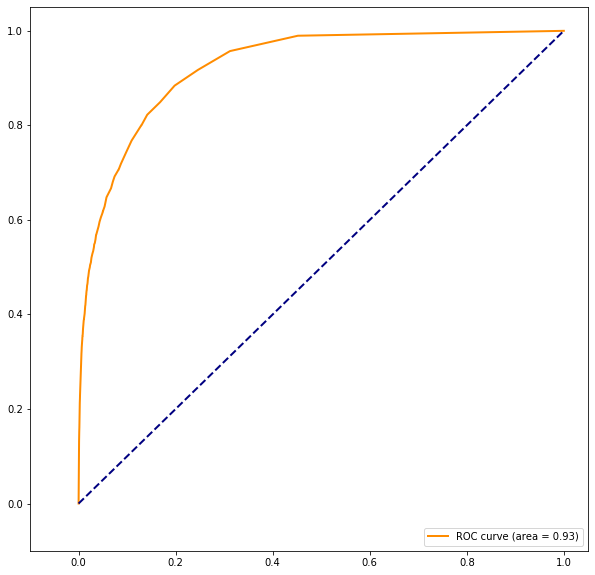

In [ ]:
#plot ROC
import matplotlib.pyplot as plt
fpr, tpr, threshold = roc_curve(link_df_new['type_e'],link_df_new['probability'])
roc_auc=auc(fpr,tpr)
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([-0.1, 1.05])
plt.ylim([-0.1, 1.05])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#build subsets of plinks
Accuracy = []
for i in range(0,10):
  plink_subset = link_df.loc[link_df['type_e'] == 0].sample(frac = 0.3)
  plink_sample_X = plink_subset.drop(['type_e', 'links',], axis = 1)
  preds_sample_Y = classifier.predict(plink_sample_X)
  plink_subset['prediction'] = preds_sample_Y
  plink_subset
  Accuracy.append(accuracy_score(plink_subset['type_e'], plink_subset['prediction']))
  # print('Accuracy =', accuracy_score(plink_subset['type_e'], plink_subset['prediction']))
  # print('AUC =', roc_auc_score(plink_subset['type_e'], plink_subset['prediction']))
  # usually only have one class('type_e' = 0)
print(np.mean(Accuracy))

0.9518159269509507
